In [1]:
# !pip install pystac-client sat-search
# !pip install rasterio

In [2]:
import os
import boto3
import rasterio as rio
import satsearch
from json import load
from rasterio.features import bounds
import matplotlib.pyplot as plt
from pyproj import Transformer

%matplotlib inline

In [3]:
SentinelSTAC = satsearch.Search.search( url = "https://earth-search.aws.element84.com/v0" )
print("Found " + str(SentinelSTAC.found()) + "items")

Found 53393207items


In [4]:
file_path = "map.geojson"
file_content = load(open(file_path))
geometry = file_content["features"][0]["geometry"]

timeRange = '2019-06-01/2021-06-01'

In [5]:
SentinelSearch = satsearch.Search.search( 
    url = "https://earth-search.aws.element84.com/v0",
    intersects = geometry,
    datetime = timeRange,
    collections = ['sentinel-s2-l2a-cogs'] )

Sentinel_items = SentinelSearch.items()
# print(Sentinel_items.summary())

for item in Sentinel_items:
    red_s3 = item.assets['B04']['href']
    print(red_s3)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/DV/2021/5/S2B_37MDV_20210530_0_L2A/B04.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/BV/2021/5/S2A_37MBV_20210528_0_L2A/B04.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/CV/2021/5/S2A_37MCV_20210528_0_L2A/B04.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/DV/2021/5/S2A_37MDV_20210528_0_L2A/B04.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/N/BA/2021/5/S2A_37NBA_20210528_0_L2A/B04.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/N/CA/2021/5/S2A_37NCA_20210528_0_L2A/B04.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/N/DA/2021/5/S2A_37NDA_20210528_0_L2A/B04.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/N/BB/2021/5/S2A_37NBB_20210528_0_L2A/B04.tif
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentine

In [6]:
item = Sentinel_items[0]
print(item.assets.keys())

dict_keys(['thumbnail', 'overview', 'info', 'metadata', 'visual', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'AOT', 'WVP', 'SCL'])


In [7]:
item.date

datetime.date(2021, 5, 30)

In [8]:
item.assets["SCL"]

{'title': 'Scene Classification Map (SCL)',
 'type': 'image/tiff; application=geotiff; profile=cloud-optimized',
 'roles': ['data'],
 'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/DV/2021/5/S2B_37MDV_20210530_0_L2A/SCL.tif',
 'proj:shape': [5490, 5490],
 'proj:transform': [20, 0, 399960, 0, -20, 10000000, 0, 0, 1]}

In [9]:
red_s3 = item.assets['B04']['href']
nir_s3 = item.assets['B08']['href']

In [10]:
date = item.properties['datetime'][0:10]

In [11]:

# def getSubset(geotiff_file, bbox):
#     with rio.open(geotiff_file) as geo_fp:
#         # Calculate pixels with PyProj 
#         Transf = Transformer.from_crs("epsg:4326", geo_fp.crs) 
#         lat_north, lon_west = Transf.transform(bbox[3], bbox[0])
#         lat_south, lon_east = Transf.transform(bbox[1], bbox[2]) 
#         x_top, y_top = geo_fp.index( lat_north, lon_west )
#         x_bottom, y_bottom = geo_fp.index( lat_south, lon_east )
#         # Define window in RasterIO
#         window = rio.windows.Window.from_slices( ( x_top, x_bottom ), ( y_top, y_bottom ) )                
#         # Actual HTTP range request
#         subset = geo_fp.read(1, window=window)
#     return subset

In [12]:
bbox = bounds(geometry)

In [13]:
def plotNDVI(nir,red,filename):
    ndvi = (nir-red)/(nir+red)
    ndvi[ndvi>1] = 1
    plt.imshow(ndvi)
    plt.savefig(filename)
    plt.close()

In [14]:
# red_s3 = item.assets['B04']['href']
# nir_s3 = item.assets['B08']['href']
# date = item.properties['datetime'][0:10]
# print("Sentinel item number " + str(0) + "/" + str(len(Sentinel_items)) + " " + date)
# red = getSubset(red_s3, bbox)
# nir = getSubset(nir_s3, bbox)
# plotNDVI(nir,red,"sentinel/" + date + "_ndvi.png")

In [15]:
tiff = rio.open("https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/DV/2021/5/S2B_37MDV_20210530_0_L2A/SCL.tif")

In [16]:
Transf = Transformer.from_crs("epsg:4326", tiff.crs) 
lat_north, lon_west = Transf.transform(bbox[3], bbox[0])
lat_south, lon_east = Transf.transform(bbox[1], bbox[2]) 
x_top, y_top = tiff.index( lat_north, lon_west )
x_bottom, y_bottom = tiff.index( lat_south, lon_east )

In [17]:
Transf

<Conversion Transformer: pipeline>
Description: UTM zone 37S
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore.
- bounds: (36.0, -80.0, 42.0, 0.0)

In [18]:
lat_north, lon_west, lat_south, lon_east

(262357.3156032828, 10095083.459148236, 450043.13644084794, 9927140.161892053)

In [19]:
x_top, y_top, x_bottom, y_bottom 

(-4755, -6881, 3642, 2504)

In [20]:
window = rio.windows.Window.from_slices( ( x_top, x_bottom ), ( y_top, y_bottom ), tiff.width, tiff.height ) 

In [21]:
subset = tiff.read(1, window=window)

In [22]:
subset

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5]], dtype=uint8)

In [23]:
def getSubset(geotiff_file, bbox):
    with rio.open(geotiff_file) as geo_fp:
        # Calculate pixels with PyProj 
        Transf = Transformer.from_crs("epsg:4326", geo_fp.crs) 
        lat_north, lon_west = Transf.transform(bbox[3], bbox[0])
        lat_south, lon_east = Transf.transform(bbox[1], bbox[2]) 
        x_top, y_top = geo_fp.index( lat_north, lon_west )
        x_bottom, y_bottom = geo_fp.index( lat_south, lon_east )
        # Define window in RasterIO
        window = rio.windows.Window.from_slices( ( x_top, x_bottom ), ( y_top, y_bottom ), tiff.width, tiff.height ) 
        # Actual HTTP range request
        subset = geo_fp.read(1, window=window)
    return subset

In [26]:
red_s3 = item.assets['B04']['href']
nir_s3 = item.assets['B08']['href']
date = item.properties['datetime'][0:10]
print("Sentinel item number " + str(0) + "/" + str(len(Sentinel_items)) + " " + date)
red = getSubset(red_s3, bbox)
nir = getSubset(nir_s3, bbox)

Sentinel item number 0/1417 2021-05-30


/var/folders/4k/gc1r5y511kggj3rv4x27przh0000gq/T/ipykernel_31919/2980054000.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir-red)/(nir+red)


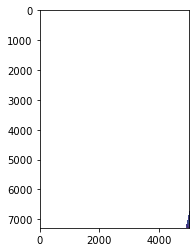

In [27]:
ndvi = (nir-red)/(nir+red)
ndvi[ndvi>1] = 1
plt.imshow(ndvi)

TypeError: Image data of dtype <U117 cannot be converted to float

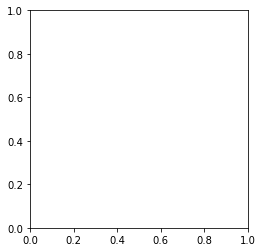

In [30]:
plt.imshow(red_s3)

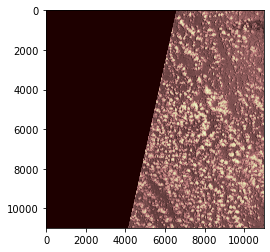

In [44]:
plt.imshow(rio.open("https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/DV/2021/3/S2A_37MDV_20210326_0_L2A/B04.tif").read(1), cmap='pink')

In [45]:
from rasterio.plot import show

In [46]:
im = rio.open("https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/DV/2021/3/S2A_37MDV_20210326_0_L2A/B04.tif")

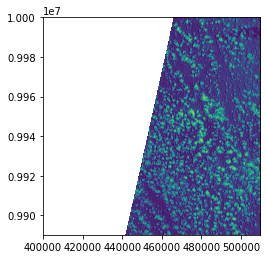

<AxesSubplot:>

In [47]:
show(im)

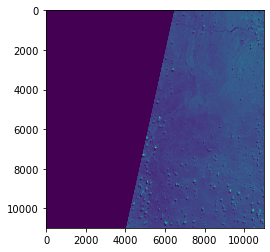

In [39]:
plt.imshow(rio.open("B08.tif").read(1))

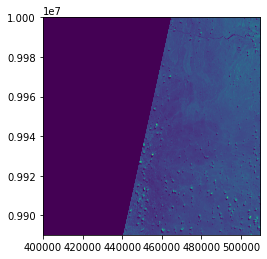

<AxesSubplot:>

In [38]:
show(im.read(), transform=im.transform)

IndexError: band index 2 out of range (not in (1,))

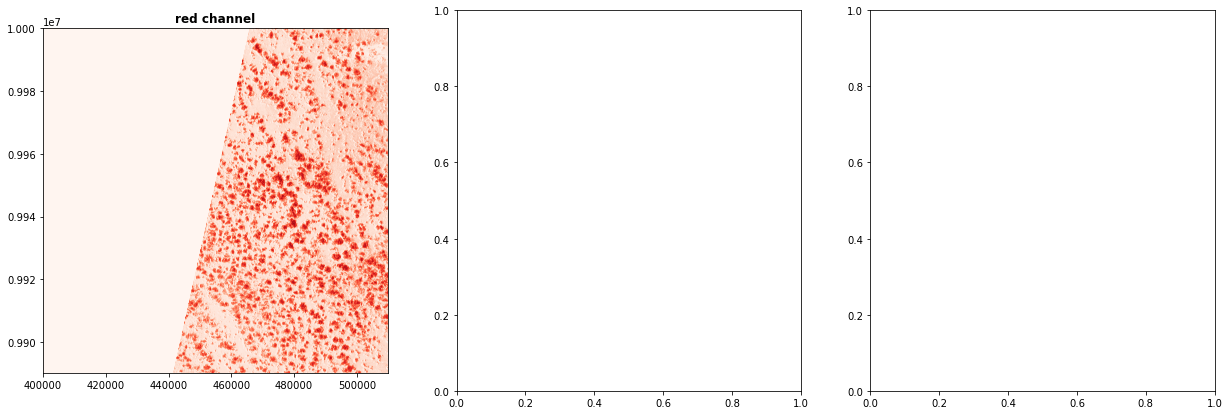

In [48]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
show((im, 1), ax=axr, cmap='Reds', title='red channel')
show((im, 2), ax=axg, cmap='Greens', title='green channel')
show((im, 3), ax=axb, cmap='Blues', title='blue channel')

In [51]:
item.assets["visual"]

{'title': 'True color image',
 'type': 'image/tiff; application=geotiff; profile=cloud-optimized',
 'roles': ['overview'],
 'gsd': 10,
 'eo:bands': [{'name': 'B04',
   'common_name': 'red',
   'center_wavelength': 0.6645,
   'full_width_half_max': 0.038},
  {'name': 'B03',
   'common_name': 'green',
   'center_wavelength': 0.56,
   'full_width_half_max': 0.045},
  {'name': 'B02',
   'common_name': 'blue',
   'center_wavelength': 0.4966,
   'full_width_half_max': 0.098}],
 'href': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/DV/2021/5/S2B_37MDV_20210530_0_L2A/TCI.tif',
 'proj:shape': [10980, 10980],
 'proj:transform': [10, 0, 399960, 0, -10, 10000000, 0, 0, 1]}